## CA 4, LLMs Spring 2024

- **Name:** Majid Faridfar
- **Student ID:** 810199569

---

# Evaluation (25 points)

## Evaluating text using a language model

One way of evaluating text generation is by using a language model.
In this assignment, we want to use BERTScore to compare the similarity of sentences.
After reading [BERTScore paper](https://arxiv.org/abs/1904.09675) answer the following questions.

### 1.1)
How does BERTScore evaluate semantic equivalence? (5 points)

> `BERTScore` uses a pre-trained language model like BERT to generate contextual embeddings for each token in the reference and candidate sentences. These embeddings capture semantic information by considering the context in which each word appears.
>
> For each token in the candidate sentence, BERTScore calculates the cosine similarity with each token in the reference sentence. This measures how similar the embeddings are and compares the semantic content of the words.
>
> Then it calculates precision, recall and F1-score for each token.
> - Precision: For each token in the candidate sentence, find the most similar token in the reference sentence and average these similarities.
> - Recall: For each token in the reference sentence, find the most similar token in the candidate sentence and average these similarities.
> - F1 Score: Compute the harmonic mean of Precision and Recall to get a balanced measure.
>
> Then the scores are aggregated across all tokens to provide a single BERTScore for the entire sentence pair which shows how well the candidate sentence semantically matches the reference sentence.
>
>

### 1.2)
How is BERTScore is better than n-gram based metrics like BLEU?

> 1. **Semantic Understanding**: BERTScore captures deeper semantic relationships and contextual meanings of words. For example, it can understand that "car" and "automobile" are similar in meaning even if they don't share n-grams, while n-gram based metrics like BELU relies on exact n-gram match and do not account for synonyms or paraphrasing. They treat "car" and "automobile" as different, penalizing the candidate sentence unnecessarily.
> 2. **Contextual Sensitivity and Robustness to Variations**: BERTScore uses contextual embeddings that take into account the position and surrounding words, providing a nuanced understanding of each word's meaning in context. SO it is more robust to variations in phrasing and word order as long as the semantic content is preserved. While n-gram based metrics like BELU ignore context beyond the n-gram window which results in potential misinterpretations of word importance and relationships and Penalizing rephrasings and changes in word order, even if the meaning remains the same.
> 3. **Handling Long Sentences** BERTScore is better at evaluating long and complex sentences because it looks at the overall semantic content rather than just short n-gram overlaps, while n-gram based metrics' performance can degrade with longer sentences due to the sparsity of longer n-gram matches.

### 2)
Implement BERTScore recall $R_{BERT}$ in the paper. You don't need to bother with the Importance Weighting. We use a more modern model called deberta which is better than bert in many ways. Then visualize similarity matrix. You can use the visualization code given to you. (7 points)

In [ ]:
import torch
import numpy as np
from transformers import AutoTokenizer, AutoModel

tokenizer = AutoTokenizer.from_pretrained("microsoft/deberta-v3-small")
model = AutoModel.from_pretrained("microsoft/deberta-v3-small")

def cosine_similarity(a, b):
    # return # WRITE YOUR CODE HERE (implement using pytorch CosineSimilarity)
    # return torch.nn.functional.cosine_similarity(a, b)
    return np.dot(a, b) / (np.linalg.norm(a) * np.linalg.norm(b))

def bert_score(reference, candidate):


    # WRITE YOUR CODE HERE (Tokenize the input text)
    # ref_tokens = "tokenize reference sentence"
    ref_tokens = tokenizer(reference, return_tensors='pt', add_special_tokens=False)
    # candidate_tokens = "you should know what to do here"
    candidate_tokens = tokenizer(candidate, return_tensors='pt', add_special_tokens=False)

    model.eval()
    with torch.no_grad():
        # WRITE YOUR CODE HERE (get the embeddings please)
        ref_outputs = model(**ref_tokens)
        ref_embeddings = ref_outputs.last_hidden_state[0]

        candidate_outputs = model(**candidate_tokens)
        candidate_embeddings = candidate_outputs.last_hidden_state[0]


    # similarities = "The similarities matrix"
    similarities = np.zeros((candidate_embeddings.shape[0], ref_embeddings.shape[0]))
    for i, c in enumerate(candidate_embeddings):
        for j, r in enumerate(ref_embeddings):
            similarities[i, j] = cosine_similarity(c, r)

    # R_BERT = """You can see max in the BERTScore formula in the paper. Then what are you waiting for? Implement the thing.
    #         Pay attention to the fact that you are computing recall. It's important to be careful about
    #           which axis you are getting the max on."""
    R_BERT = similarities.max(axis=1)

    bertscore = R_BERT.mean()


    return bertscore, similarities

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/52.0 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/578 [00:00<?, ?B/s]

spm.model:   0%|          | 0.00/2.46M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/convert_slow_tokenizer.py:560: UserWarning: The sentencepiece tokenizer that you are converting to a fast tokenizer uses the byte fallback option which is not implemented in the fast tokenizers. In practice this means that the fast version of the tokenizer can produce unknown tokens whereas the sentencepiece version would have converted these unknown tokens into a sequence of byte tokens matching the original piece of text.
  warnings.warn(


pytorch_model.bin:   0%|          | 0.00/286M [00:00<?, ?B/s]

In [ ]:
reference = "Cats are cute"
candidate = "Cats are annoying"

bertscore, sim_matrix = bert_score(
    reference, candidate)

print(bertscore)
print(sim_matrix)

0.8331757386525472
[[0.88271761 0.65975493 0.71529263]
 [0.62625301 0.72385287 0.78810501]
 [0.69766474 0.71104884 0.8287046 ]]


In [ ]:
import matplotlib.pyplot as plt
import numpy as np


def heatmap(
    matrix,
    hide_spines=False,
    hide_ticks=False,
    figsize=None,
    cmap=None,
    colorbar=True,
    row_names=None,
    column_names=None,
    column_name_rotation=45,
    cell_values=True,
    cell_fmt=".2f",
    cell_font_size=None,
):

    if row_names is not None and len(row_names) != matrix.shape[0]:
        raise AssertionError(
            f"len(row_names) (got {len(row_names)})"
            " should be equal to number of"
            " rows in the input "
            f" array (expect {matrix.shape[0]})."
        )

    if column_names is not None and len(column_names) != matrix.shape[1]:
        raise AssertionError(
            f"len(column_names)"
            " (got {len(column_names)})"
            " should be equal to number of"
            " columns in the"
            f" input array (expect {matrix.shape[1]})."
        )

    fig, ax = plt.subplots(figsize=figsize)
    ax.grid(False)

    if cmap is None:
        cmap = plt.cm.viridis

    if figsize is None:
        figsize = (len(matrix) * 1.5, len(matrix) * 1.5)

    matshow = ax.matshow(matrix, cmap=cmap)

    if colorbar:
        fig.colorbar(matshow)

    normed_matrix = matrix.astype("float") / matrix.max()

    if cell_values:
        for i in range(matrix.shape[0]):
            for j in range(matrix.shape[1]):
                cell_text = format(matrix[i, j], cell_fmt)

                ax.text(
                    x=j,
                    y=i,
                    size=cell_font_size,
                    s=cell_text,
                    va="center",
                    ha="center",
                    color="black"
                    if normed_matrix[i, j] > np.max(normed_matrix) / 2
                    else "black",
                )

    if row_names is not None:
        tick_marks = np.arange(len(row_names))
        plt.yticks(tick_marks, row_names)

    if column_names is not None:
        tick_marks = np.arange(len(column_names))

        if column_name_rotation:
            plt.xticks(
                tick_marks,
                column_names,
                rotation=column_name_rotation,
                ha="right",
                rotation_mode="anchor",
            )
        else:
            plt.xticks(tick_marks, column_names)

    if hide_spines:
        ax.spines["right"].set_visible(False)
        ax.spines["top"].set_visible(False)
        ax.spines["left"].set_visible(False)
        ax.spines["bottom"].set_visible(False)
    ax.yaxis.set_ticks_position("left")
    ax.xaxis.set_ticks_position("bottom")
    if hide_ticks:
        ax.axes.get_yaxis().set_ticks([])
        ax.axes.get_xaxis().set_ticks([])

    return fig, ax

<ipython-input-6-2ca6820feeeb>:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  viridisBig = cm.get_cmap('Blues', 512)


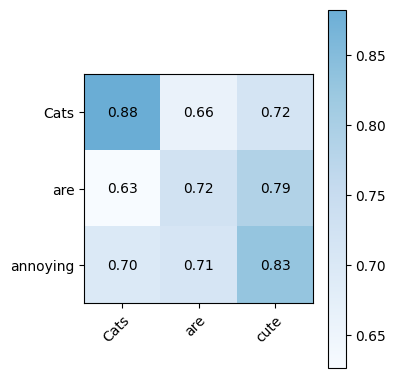

In [ ]:
from matplotlib import cm
from matplotlib.colors import ListedColormap

viridisBig = cm.get_cmap('Blues', 512)
newcmp = ListedColormap(viridisBig(np.linspace(0.0, 0.5, 256)))

fig, ax = heatmap(sim_matrix, column_names=reference.split(), row_names=candidate.split(), cmap=newcmp, figsize=(4, 4))

plt.tight_layout();
plt.show()

### 3)
Using the [Official BERTScore](https://github.com/Tiiiger/bert_score) package. Compare your implementation with the official one and tell us why they differ. (3 points)

In [ ]:
!pip install bert-score

In [ ]:
import torch
from bert_score import score

reference = "Cats are cute"
candidate = "Cats are annoying"

P, R, F1 = score(
    # WRITE YOUR CODE HERE (complete yourself)
    [candidate], [reference], lang='en', model_type="microsoft/deberta-v3-small", device=torch.device('cuda' if torch.cuda.is_available() else 'cpu')
)

In [ ]:
print(f"Precision: {P.item():.4f}")
print(f"Recall: {R.item():.4f}")
print(f"F1 Score: {F1.item():.4f}")

Precision: 0.9318
Recall: 0.9318
F1 Score: 0.9318


### 4)
Download datasets "sst2" and "imdb" from huggingface datasets. Both of these datasets are for the same task but their distribution differs. In what ways their distribution differ according to [this paper](https://aclanthology.org/2021.emnlp-main.835/)?

randomly choose ten sentences from negative and ten sentences from positive labels of each dataset (forty sentences in total)

use your implementation of BERTScore and compute similarity of

a) sentences that are in the same dataset and have same label and take average

b) sentences that are in the same dataset and have opposite label and take average

c) sentences that are in different datasets and have same label and take average

d) sentences that are in the different dataset and have opposite label and take average

How these numbers differ and why? (for example for part a you should put each sentence as reference once and compare it with ten candidate sentences including itself, after doing this for all ten sentences you get a hundred scores and then an average.) (10 points)

In [ ]:
from datasets import load_dataset
import random

sst2_dataset = load_dataset("stanfordnlp/sst2", split='train')
imdb_dataset = load_dataset("stanfordnlp/imdb", split='train')

In [ ]:
display(sst2_dataset)
display(imdb_dataset)

Dataset({
    features: ['idx', 'sentence', 'label'],
    num_rows: 67349
})

Dataset({
    features: ['text', 'label'],
    num_rows: 25000
})

In [ ]:
def sample_sentences(dataset, label, num_samples=10):
    filtered_dataset = [item for item in dataset if item['label'] == label]

    return random.sample(filtered_dataset, num_samples)

In [ ]:
sst2_neg_samples = sample_sentences(sst2_dataset, label=0)
sst2_pos_samples = sample_sentences(sst2_dataset, label=1)

imdb_neg_samples = sample_sentences(imdb_dataset, label=0)
imdb_pos_samples = sample_sentences(imdb_dataset, label=1)

In [ ]:
sst2_pos = 0
sst2_neg = 0
sst2_pos_and_neg = 0

for x in sst2_pos_samples:
  for y in sst2_pos_samples:
    bs, _ = bert_score(x['sentence'], y['sentence'])
    sst2_pos += bs

for x in sst2_neg_samples:
  for y in sst2_neg_samples:
    bs, _ = bert_score(x['sentence'], y['sentence'])
    sst2_neg += bs

for x in sst2_pos_samples:
  for y in sst2_neg_samples:
    bs, _ = bert_score(x['sentence'], y['sentence'])
    sst2_pos_and_neg += bs

In [ ]:
imdb_pos = 0
imdb_neg = 0
imdb_pos_and_neg = 0

for x in imdb_pos_samples:
  for y in imdb_pos_samples:
    bs, _ = bert_score(x['text'], y['text'])
    imdb_pos += bs

for x in imdb_neg_samples:
  for y in imdb_neg_samples:
    bs, _ = bert_score(x['text'], y['text'])
    imdb_neg += bs

for x in imdb_pos_samples:
  for y in imdb_neg_samples:
    bs, _ = bert_score(x['text'], y['text'])
    imdb_pos_and_neg += bs

In [ ]:
pos = 0
neg = 0

for x in imdb_pos_samples:
  for y in sst2_pos_samples:
    bs, _ = bert_score(x['text'], y['sentence'])
    pos += bs

for x in imdb_neg_samples:
  for y in sst2_neg_samples:
    bs, _ = bert_score(x['text'], y['sentence'])
    neg += bs

In [ ]:
sst2_pos_imdb_neg = 0
sst2_neg_imdb_pos = 0

for x in sst2_pos_samples:
  for y in imdb_neg_samples:
    bs, _ = bert_score(x['sentence'], y['text'])
    sst2_pos_imdb_neg += bs

for x in sst2_neg_samples:
  for y in imdb_pos_samples:
    bs, _ = bert_score(x['sentence'], y['text'])
    sst2_neg_imdb_pos += bs

In [ ]:
print("***********************************************************************************")
print("Sentences that are in the same dataset and have same label and take average")
print("SST2 Positives:", sst2_pos/100)
print("SST2 Negatives:", sst2_neg/100)
print("SST2 Average:", (sst2_pos + sst2_neg)/200)
print("IMDB Positives:", imdb_pos/100)
print("IMDB Negativea:", imdb_neg/100)
print("IMDB Average:", (imdb_pos + imdb_neg)/200)
print("Average:", (sst2_pos + sst2_neg + imdb_pos + imdb_neg)/400)
print("***********************************************************************************")
print("Sentences that are in the same dataset and have opposite label and take average")
print("SST2 Potitives and Negatives:", sst2_pos_and_neg/100)
print("IMDB Potitives and Negatives:", imdb_pos_and_neg/100)
print("Average:", (sst2_pos_and_neg + imdb_pos_and_neg)/200)
print("***********************************************************************************")
print("Sentences that are in different datasets and have same label and take average")
print("SST2 and IMDB Positives:", pos/100)
print("SST2 and IMDB Negatives:", neg/100)
print("Average:", (pos + neg)/200)
print("***********************************************************************************")
print("Sentences that are in the different dataset and have opposite label and take average")
print("SST2 Positives and IMDB Negatives:", sst2_pos_imdb_neg/100)
print("IMDB Positives and SST2 Negatives:", sst2_neg_imdb_pos/100)
print("Average:", (sst2_pos_imdb_neg + sst2_neg_imdb_pos)/200)
print("***********************************************************************************")

***********************************************************************************
Sentences that are in the same dataset and have same label and take average
SST2 Positives: 0.5699929865528843
SST2 Negatives: 0.572371666386179
SST2 Average: 0.5711823264695317
IMDB Positives: 0.7043212096141217
IMDB Negativea: 0.7153081473597166
IMDB Average: 0.7098146784869193
Average: 0.6404985024782255
***********************************************************************************
Sentences that are in the same dataset and have opposite label and take average
SST2 Potitives and Negatives: 0.530831246075633
IMDB Potitives and Negatives: 0.6726201295781822
Average: 0.6017256878269076
***********************************************************************************
Sentences that are in different datasets and have same label and take average
SST2 and IMDB Positives: 0.5920904549518089
SST2 and IMDB Negatives: 0.582560782017419
Average: 0.5873256184846141
*****************************************

> 1. Average similarity score of common-label samples within both datasets is higher than average similarity of different-label within both datasets, which is logical. Because two positive samples are likely to be more similar compared to one positive and one negative sample. But this difference is a little bit which is logical again. Because samples of one specific dataset are related to each other whatever their label is, because they are talking about one thing.
>    - SST2:
>        - Common-label: 0.57
>        - Different-label: 0.53
>    - IMDB:
>        - Common-label: 0.70
>        - Different-label: 0.67
> 2. Average similarity score of only-positive or only-negative samples between two datasets are something between average similarity score of `SST2 Potitives and Negatives` and `IMDB Potitives and Negatives` (it seems to be their average). Which is logical, because of the aggregation (I'm not sure about this one).
> 3. The similarity scores of IMDB dataset are higher than SST2 dataset, which shows that the IMDB samples talk about common topics more than SST2 samples do or shows IMDB dataset got more samples.
> 4. Average similarity score of different-dataset common-label samples is higher than different-dataset different-lable samples which makes sense. Because in the first case, they are at least on the same topics!